# Installing and importing Libraries

In [1]:
%%capture
!mamba install -- upgrade scikit-learn=1.2.1
!mamba install seaborn --y

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [3]:
import skillsnetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
sns.set(style="whitegrid", color_codes=True)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Parkinson Data

### Dataset

Oxford Parkinson's Disease Detection Dataset : https://archive.ics.uci.edu/dataset/174/parkinsons


The dataset consists of biomedical voice measurements from 31 individuals, with 23 having Parkinson's disease (PD). Each row represents a voice recording, identified by the "name" column, and each column corresponds to a specific voice measure. The primary objective is to differentiate healthy individuals (status=0) from those with PD (status=1). The dataset is provided in ASCII CSV format, with approximately six recordings per patient. 


The dataset on voice disorders serves the purpose of detecting Parkinson's disease in individuals. Although existing tools face challenges in analyzing intricate voice disorders, progress in technology and research has led to the creation of advanced algorithms capable of recognizing distinct acoustic markers linked to Parkinson's disease in voice recordings. As a result, studying voice disorders can offer valuable insights for diagnosing and tracking the progression of Parkinson's disease.

### Loading data

In [5]:
data = pd.read_csv('parkinsons.data', sep=',', index_col='name') # assign index column to name 
data.shape

(195, 23)

In [6]:
data.head(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Let's visualize the association between our variables in a correlation matrix

<AxesSubplot:>

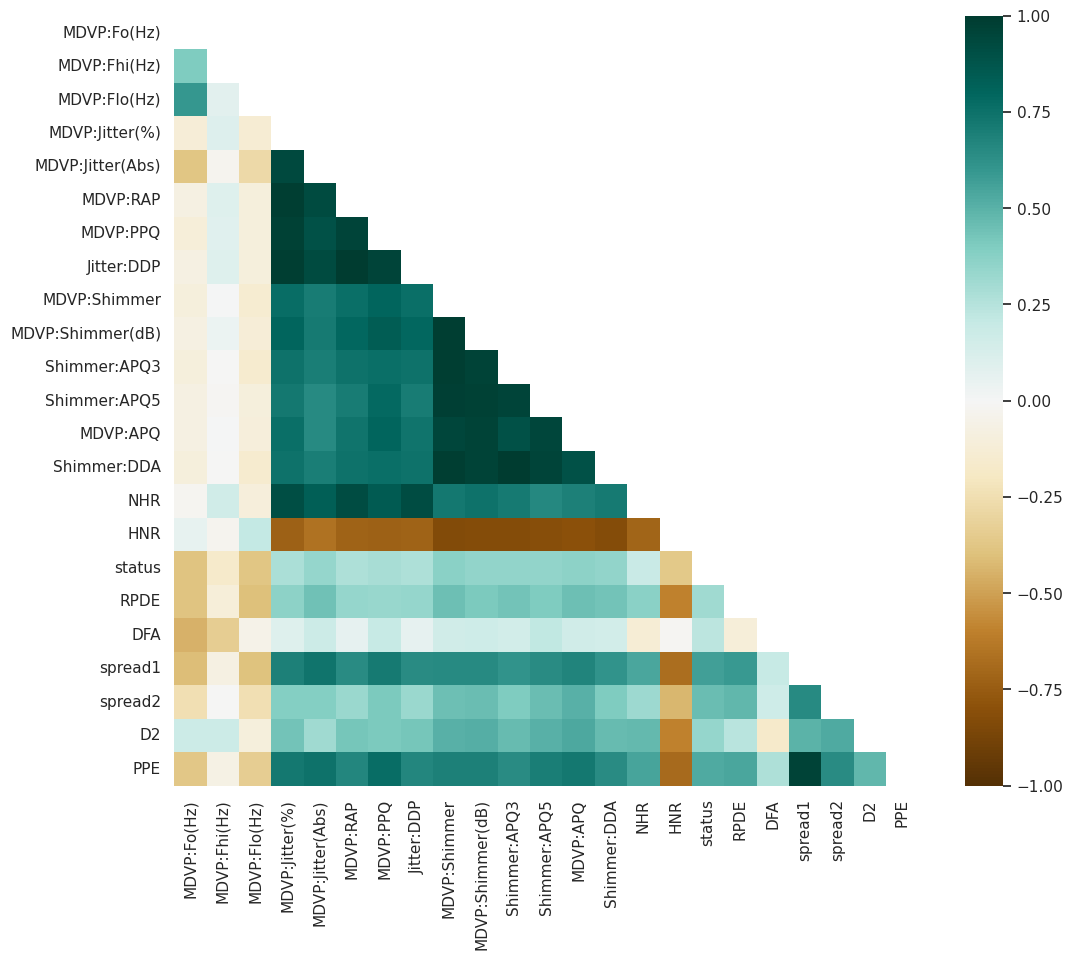

In [7]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)

Let's visualize the correlation to the status

Text(0.5, 1.0, 'Features Correlating with Parkinson existance')

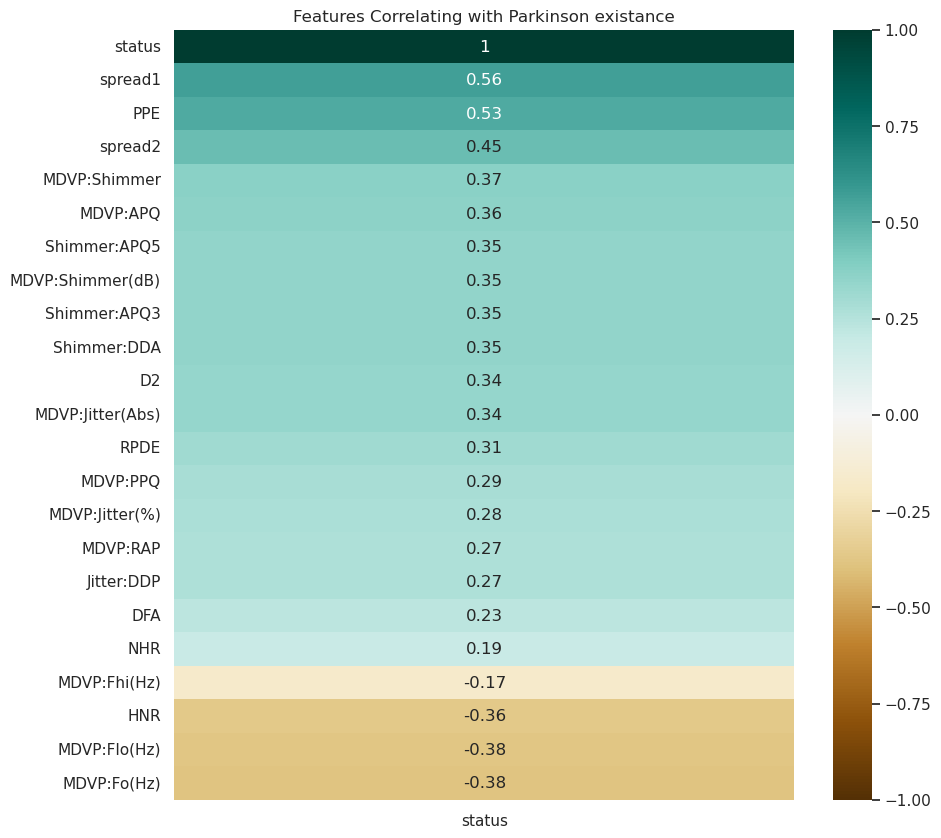

In [8]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance')

Let's get the features X (all columns except the status)

In [9]:
X = data.drop('status', axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
y=data['status']
y.head()

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
Name: status, dtype: int64

75% of our dataset records have Parkinson's

In [11]:
y.value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

I will use t-SNE (t-Distributed Stochastic Neighbor Embedding) for dimensionality reduction in order to visualize this high-dimensional datasets

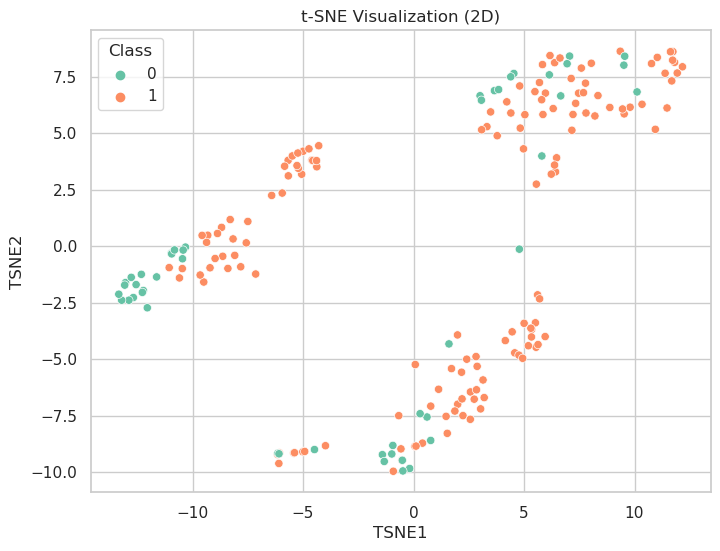

In [12]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization (2D)')
plt.show()

# Data preparation

Let's split the dataset into train and test datasets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (136, 22)
y_train shape:  (136,)
X_test shape:  (59, 22)
y_test shape:  (59,)


## k-Nearest Neighbors (KNN)

### Testing a random value of k

I will start with a value of k = 3

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Let's predict 10 records of our testing data

In [15]:
y_pred = knn.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [16]:
knn.predict_proba(X_test)[0:10]


array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

Let's take a look on the confusion matrix, the classification report and the accuracy score of the classifier

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

Confusion matrix, without normalization
[[ 9  3]
 [ 5 42]]


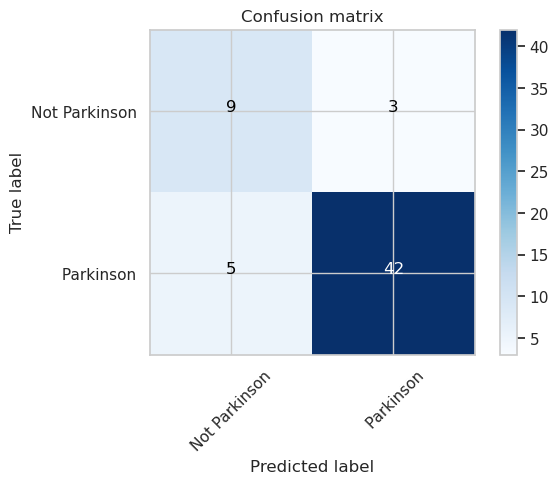

In [18]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [19]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.93      0.89      0.91        47

   micro avg       0.86      0.86      0.86        59
   macro avg       0.79      0.82      0.80        59
weighted avg       0.87      0.86      0.87        59



In [20]:
accuracy_score(y_test, y_pred)

0.864406779661017

### Using GridSearchCV

I will use GridSearch hyperparameter tuning, in order to find the optimal hyperparameter K, based on the recall as a scoring metric.
My use of recall is due to the medical nature of this testing, the model should identify correctly a large population of Parkinson's cases, we are more tolerant with false positive than with false negatif

In [21]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
}

In [22]:
knn2 = KNeighborsClassifier()

In [23]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=5)

grid_search 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [24]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [25]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 9}
Best Score:  0.970220588235294


In [26]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [27]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

recall

0.9148936170212766

Now let's train the model on all our data

In [28]:
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
y_hat =knn.predict(X)

Confusion matrix, without normalization
[[ 32  16]
 [  5 142]]


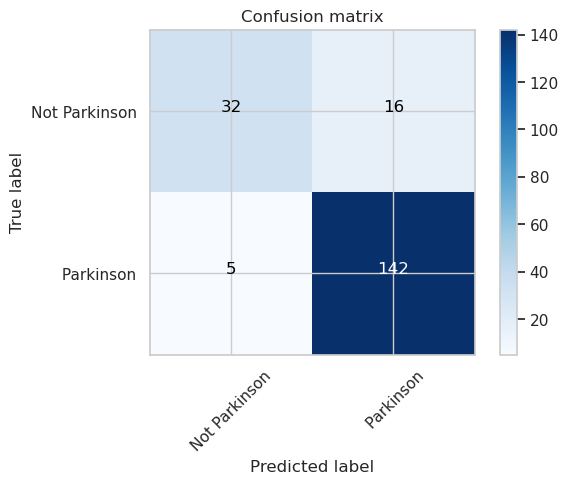

In [30]:
plot_confusion_matrix(confusion_matrix(y, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

### Interpretability of the model

Visualizing the model with t-SNE will help us gain a better insignt of how our model works

In [31]:
# find true positives(tp)
tsne_df['label']=''
tsne_df['label'].iloc[np.where((y_hat == 1) & (y == 1))]="TP"
# find true negatives (tn)
tsne_df['label'].iloc[np.where((y_hat == 0) & (y == 0))]="TN"
# find false positives (fp)
tsne_df['label'].iloc[np.where((y_hat == 1) & (y == 0))]="FP" 
# find false negatives (fp)
tsne_df['label'].iloc[np.where((y_hat == 0) & (y == 1))]="FN"

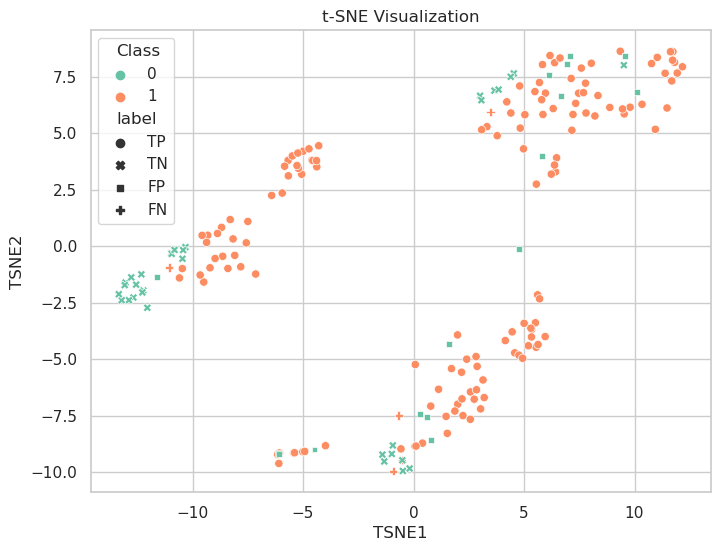

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2',style='label')
plt.title('t-SNE Visualization')
plt.show()

## Logistic Regression

In [33]:
import warnings

from sklearn.linear_model import LogisticRegression

In [34]:
l_regression = LogisticRegression()
l_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
y_pred = l_regression.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

Let's desplay the confusion matrix and the classification report for the logistic regression model

Confusion matrix, without normalization
[[ 9  3]
 [ 5 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.93      0.89      0.91        47

   micro avg       0.86      0.86      0.86        59
   macro avg       0.79      0.82      0.80        59
weighted avg       0.87      0.86      0.87        59


Accuracy Score: 0.864406779661017


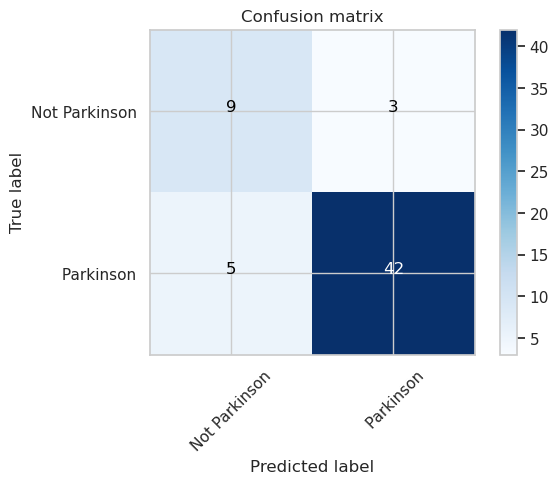

In [36]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

## Support Vector Machines (SVM)

Support Vector Machines (SVM) offer several advantages, including their effectiveness in high-dimensional spaces, versatility for classification tasks, memory efficiency through the use of support vectors, robustness to overfitting with adjustable regularization parameters.

Confusion matrix, without normalization
[[ 1 11]
 [ 0 47]]


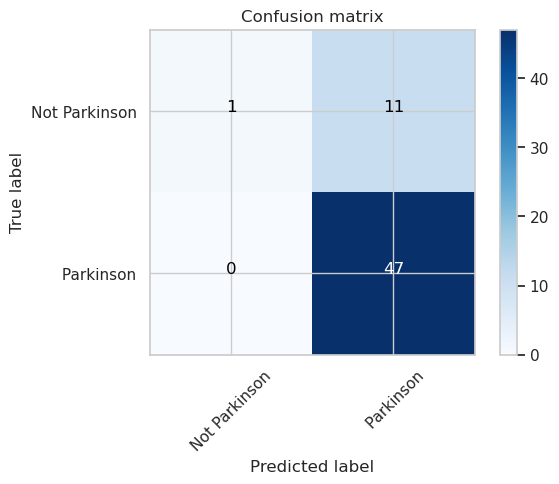

In [37]:
import warnings

# Train the SVM classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_hat = svm.predict(X_test)

# confusion_matri
plot_confusion_matrix(confusion_matrix(y_test, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [38]:
param_grid = {
    'C': [0.1, 1,],
    'gamma': [0.1, 1, 10],

}

In [39]:
# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding recall score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'gamma': 0.1}
Best recall score:  1.0
